**ISE-2** 

**MICRO PROJECT** 

**Name** = 

Shubham Datta Gaikwad[3041] 

**Problem Statement** =

Given the dataset of wheat grain seeds 
consisting of three categories. The data is 
unlabelled. Categorize the data in three 
categories. 

# AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    Area  Perimeter  compactness  length  width  Assymetry coeficient  \
0  14.88      14.57       0.8811   5.554  3.333                 1.018   
1  14.29      14.09       0.9050   5.291  3.337                 2.699   
2  13.84      13.94       0.8955   5.324  3.379                 2.259   
3  16.14      14.99       0.9034   5.658  3.562                 1.355   
4  14.38      14.21       0.8951   5.386  3.312                 2.462   

   kernal groove  out  
0          4.956    0  
1          4.825    0  
2          4.805    0  
3          5.175    0  
4          4.956    0  

 Predicted output = 
 [0 0 0 0 0 0 0 1 0 1 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 

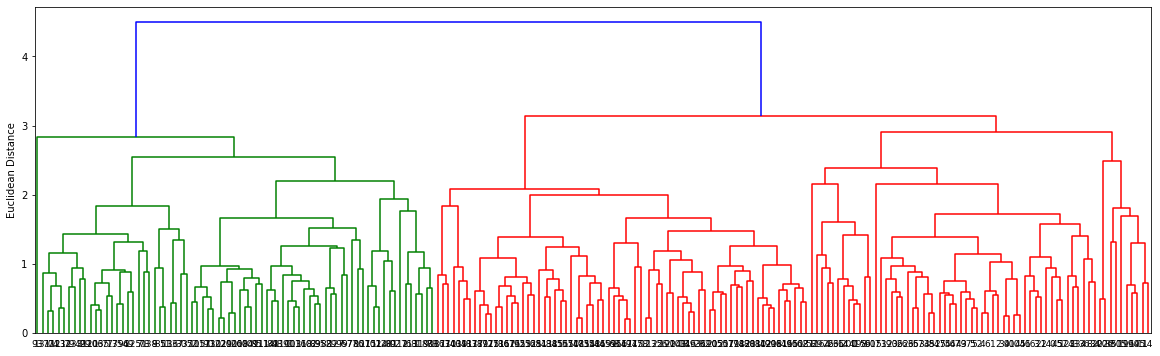

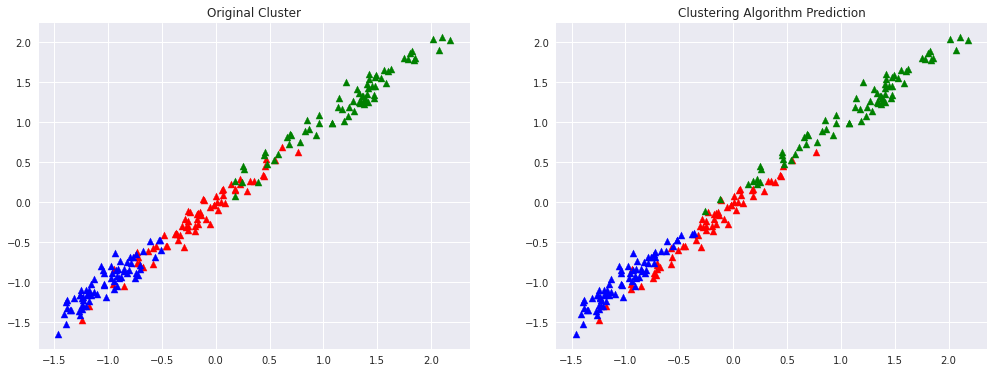

In [13]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
import scipy
from scipy.cluster import hierarchy

import sklearn
from sklearn.cluster import AgglomerativeClustering


path="/content/sample_data/seeds_dataset.csv"
df=pd.read_csv(path)
#Datset optimization
df.columns=['Area','Perimeter','compactness','length','width','Assymetry coeficient','kernal groove','out']
df['out'] = df['out'].replace(1,0)
df['out'] = df['out'].replace(2,1)
df['out'] = df['out'].replace(3,2)
print(df.head())

#Seperating features
x=df.iloc[:,0:7].values 
y=df.iloc[:,-1]

#Feature Scaling
scaler=StandardScaler()
x=scaler.fit_transform(x)

#Method for Dendrogram based on Datapoints
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');
#There are four methods for combining clusters in agglomerative approach. 
#The one I have selected to use is called Ward’s Method. Unlike the others. 
#Instead of measuring the distance directly, it analyzes the variance of clusters. 
#Ward’s is said to be the most suitable method for quantitative variables.
#Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them:
clusters=hierarchy.linkage(x,method="ward")

#plotting dendrogram
plot_dendrogram(clusters)

#Perform  agglomerative clustering 
clustering =AgglomerativeClustering(n_clusters=3,linkage="ward")
y_pred=clustering.fit_predict(x)


print("\n Predicted output = \n",y_pred)

#Visualization of the clusters
def plot_actual_prediction(x, y, y_pred):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(x[y==0,0],x[y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(x[y==1,0],x[y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(x[y==2,0],x[y==2,1], c = 'blue', marker="^", s=50)
        plt.title("Original Cluster")

        plt.subplot(1,2,2)
        plt.scatter(x[y_pred==0,0],x[y_pred==0,1], c = 'red', marker="^", s=50)
        plt.scatter(x[y_pred==1,0],x[y_pred==1,1], c = 'green', marker="^", s=50)
        plt.scatter(x[y_pred==2,0],x[y_pred==2,1], c = 'blue', marker="^", s=50)
        plt.title("Clustering Algorithm Prediction");

plot_actual_prediction(x, y, y_pred)


acc=accuracy_score(y,y_pred)
print("\n Accuracy = ",acc*100)

# K means

In [ ]:
# importing libraries    
import numpy as np   
import matplotlib.pyplot as mtp    
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the dataset  
path='/content/sample_data/seeds_dataset.csv'
df = pd.read_csv(path)
#Dataframe optimization
df.columns=['Area','Perimeter','compactness','length','width','Assymetry coeficient','kernal groove','out']  
df['out'] = df['out'].replace(1,0)
df['out'] = df['out'].replace(2,1)
df['out'] = df['out'].replace(3,2)

In [ ]:
df.head()

,Area,Perimeter,compactness,length,width,Assymetry coeficient,kernal groove,out
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0


In [ ]:
#Seperating Datset values
x = df.iloc[:, 0:7].values
y=df.iloc[:,-1]
#Feature Scaling
scaler=StandardScaler()
x=scaler.fit_transform(x)

#print(x)

[[ 0.0118402   0.00923364  0.42749407 ...  0.19764747 -1.79278662
  -0.9219711 ]
 [-0.19093968 -0.35835326  1.43894519 ...  0.20823799 -0.67216102
  -1.18860657]
 [-0.3456023  -0.47322416  1.03690395 ...  0.31943844 -0.9654836
  -1.22931428]
 ...
 [-0.56556692 -0.68764985  0.73219901 ... -0.06976315  3.07170181
  -0.71843257]
 [-1.03299173 -1.03226257 -0.79978973 ... -1.11822457 -0.07284964
  -0.7428572 ]
 [-0.87489216 -0.93270779 -0.10997159 ... -0.75285165  1.28643389
  -0.70418488]]


In [ ]:
#training the K-means model on dataset x  
kmeans = KMeans(n_clusters=3,init='random',random_state= 15)  
y_predict= kmeans.fit_predict(x)

#print(y)
print("\n Predicted output = \n",y_predict)



 Predicted output = 
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 0 0 0 0 0 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2]


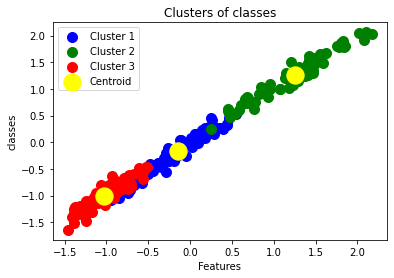

In [ ]:
#visulaization of the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of classes')  
mtp.xlabel('Features')  
mtp.ylabel('classes')  
mtp.legend()  
mtp.show()  

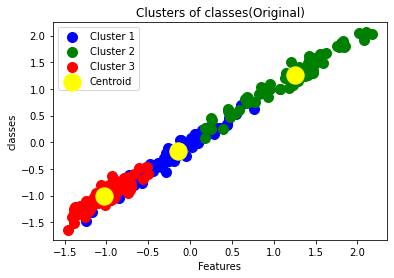

In [ ]:
#Visualization of original clusters
mtp.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')   
mtp.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'green', label = 'Cluster 2')   
mtp.scatter(x[y== 2, 0], x[y == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of classes(Original)')  
mtp.xlabel('Features')  
mtp.ylabel('classes')  
mtp.legend()  
mtp.show()

In [ ]:

#Accuracy of the model
acc=accuracy_score(y,y_predict)
#print(acc)
print("\n Accuracy= ",acc*100)


 Accuracy=  91.86602870813397


<BarContainer object of 5 artists>


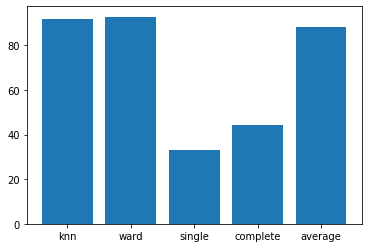

In [18]:
li=['knn','ward','single','complete','average']
li1=[91.8,92.8,33.01,44.14,88.03]
fig=pd.DataFrame({'algorithm':li,'accuracy':li1})
print(plt.bar(fig['algorithm'].values,fig['accuracy'].values))